# 2048 Agent

Este notebook permitirá hacer una comparación de los diferentes algoritmos (Minimax, Minimax con Alpha Beta Pruning y Expectimax) en la ejecución de un juego automático de 2048.

In [1]:
from game import GameNoUI
from multiAgent import ExpectimaxAgent, MinimaxAgent, AlphaBetaAgent, evaluationFunction2048
import time
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda, crea una instancia del agente, especificando la función de evaluación y la profundidad que el agente va a analizar y corre un juego usandolo.

In [2]:
agent = ExpectimaxAgent(evalFn=evaluationFunction2048, depth=2) 
game = GameNoUI(agent)
start_time = time.time()
score = game.run()
end_time = time.time()

print(f"Time taken: {end_time - start_time} seconds")

Game Over!
Final Score: 1872
Max Tile: 1024
Time taken: 69.02560901641846 seconds


## Profundidad 2
Ahora, para cada agente vamos a ejecutar un número de juegos, para poder calcular un promedio del tiempo que tarda y el score final. Finalmente, los resultados se muestran en una gráfica.

In [3]:
NUM_JUEGOS = 10
agentes = {
    "Expectimax": ExpectimaxAgent(evalFn=evaluationFunction2048, depth=2),
    "Minimax": MinimaxAgent(evalFn=evaluationFunction2048, depth=2),
    "AlphaBeta": AlphaBetaAgent(evalFn=evaluationFunction2048, depth=2)
}

resultados = {nombre: {"scores": [], "tiempos": [], "maxTile": []} for nombre in agentes.keys()}

for nombre, agente in agentes.items():
    for _ in range(NUM_JUEGOS):
        game = GameNoUI(agente)
        start_time = time.time()
        score = game.run()
        end_time = time.time()
        
        resultados[nombre]["scores"].append(score)
        resultados[nombre]["tiempos"].append(end_time - start_time)
        resultados[nombre]["maxTile"].append(game.getMaxTile())


Game Over!
Final Score: 1386
Max Tile: 1024
Game Over!
Final Score: 1218
Max Tile: 512
Game Over!
Final Score: 1992
Max Tile: 1024
Game Over!
Final Score: 1064
Max Tile: 512
Game Over!
Final Score: 706
Max Tile: 256
Game Over!
Final Score: 1036
Max Tile: 512
Game Over!
Final Score: 1082
Max Tile: 512
Game Over!
Final Score: 956
Max Tile: 512
Game Over!
Final Score: 2104
Max Tile: 1024
Game Over!
Final Score: 1970
Max Tile: 1024
Game Over!
Final Score: 842
Max Tile: 512
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 842
Max Tile: 512
Game Over!
Final Score: 534
Max Tile: 256
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score: 998
Max Tile: 512
Game Over!
Final Score: 998
Max Tile: 512
Game Over!
Final Score: 842
Max Tile: 512
Game Over!
Final Score: 600
Max Tile: 256
Game Over!
Final Score

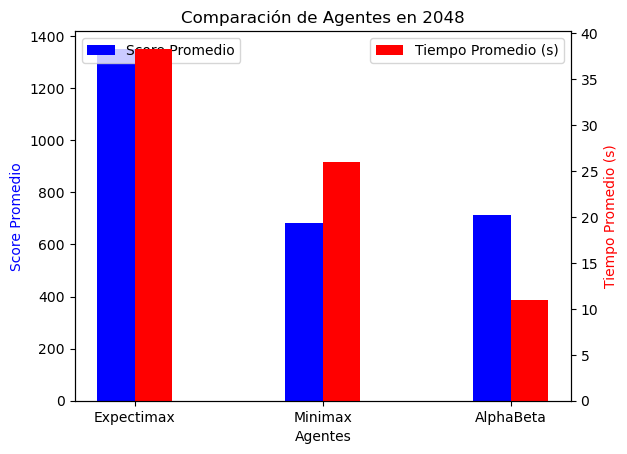

In [4]:
# Graficar resultados
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ancho = 0.2
indices = np.arange(len(agentes))
promedios_scores = [np.mean(resultados[nombre]["scores"]) for nombre in agentes.keys()]
promedios_tiempos = [np.mean(resultados[nombre]["tiempos"]) for nombre in agentes.keys()]
barras1 = ax1.bar(indices - ancho/2, promedios_scores, ancho, label='Score Promedio', color='b')
barras2 = ax2.bar(indices + ancho/2, promedios_tiempos, ancho, label='Tiempo Promedio (s)', color='r')
ax1.set_xlabel('Agentes')
ax1.set_ylabel('Score Promedio', color='b')
ax2.set_ylabel('Tiempo Promedio (s)', color='r')
ax1.set_xticks(indices)
ax1.set_xticklabels(agentes.keys())
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de Agentes en 2048')
plt.show()

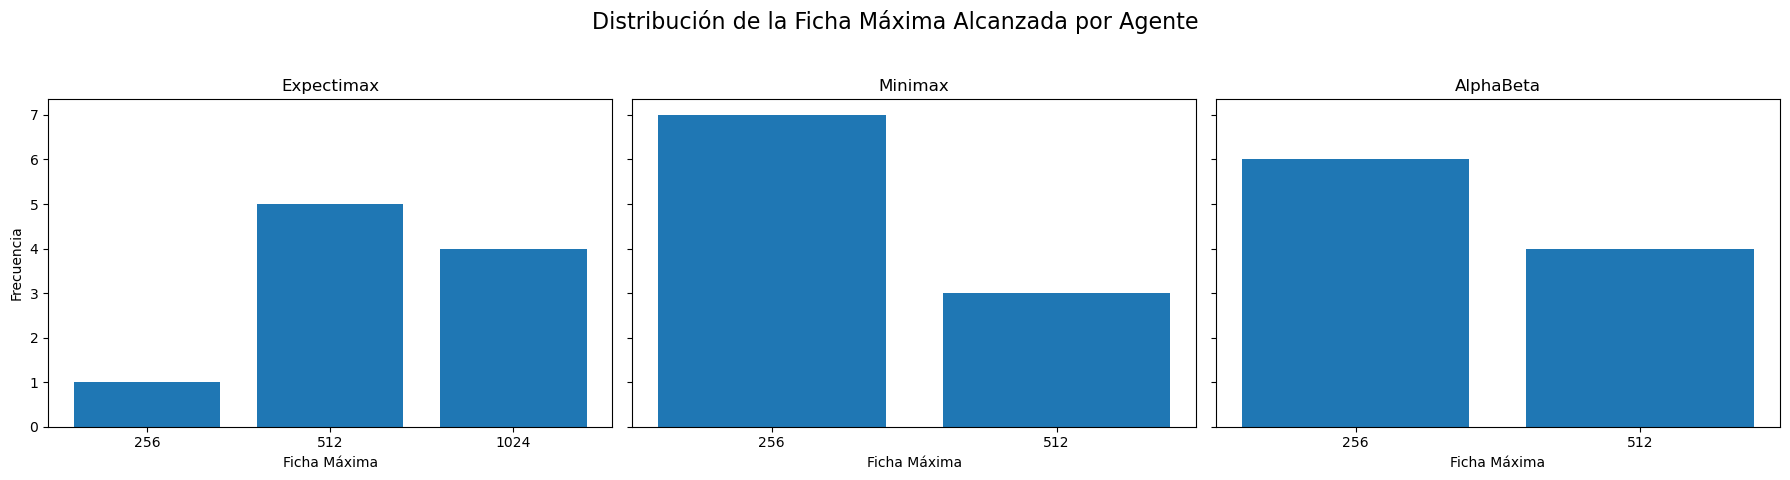

In [5]:
fig, axs = plt.subplots(1, len(agentes), figsize=(18, 5), sharey=True)
fig.suptitle('Distribución de la Ficha Máxima Alcanzada por Agente', fontsize=16)

for i, nombre in enumerate(agentes.keys()):
    tiles, counts = np.unique(resultados[nombre]["maxTile"], return_counts=True)
    
    axs[i].bar(tiles.astype(str), counts)
    axs[i].set_title(nombre)
    axs[i].set_xlabel('Ficha Máxima')
    if i == 0:
        axs[i].set_ylabel('Frecuencia')

plt.tight_layout(rect=(0.0, 0.03, 1.0, 0.95))
plt.show()

## Minimax con Alpha Beta Pruning

Este agente, de acuerdo a las gráficas anteriores, es bastante rápido en calcular las sigueintes jugadas. Por tal motivo, haremos una comparativa del tiempo y score tomando profundidades 2 y 3.

In [5]:
agentes = {
    "AlphaBeta (2)": AlphaBetaAgent(evalFn=evaluationFunction2048, depth=2),
    "AlphaBeta (3)": AlphaBetaAgent(evalFn=evaluationFunction2048, depth=3)
}

resultados = {nombre: {"scores": [], "tiempos": []} for nombre in agentes.keys()}

for nombre, agente in agentes.items():
    game = GameNoUI(agente)
    start_time = time.time()
    score = game.run()
    end_time = time.time()
    
    resultados[nombre]["scores"].append(score)
    resultados[nombre]["tiempos"].append(end_time - start_time)

Game Over!
Final Score: 548
Max Tile: 256
Game Over!
Final Score: 598
Max Tile: 256


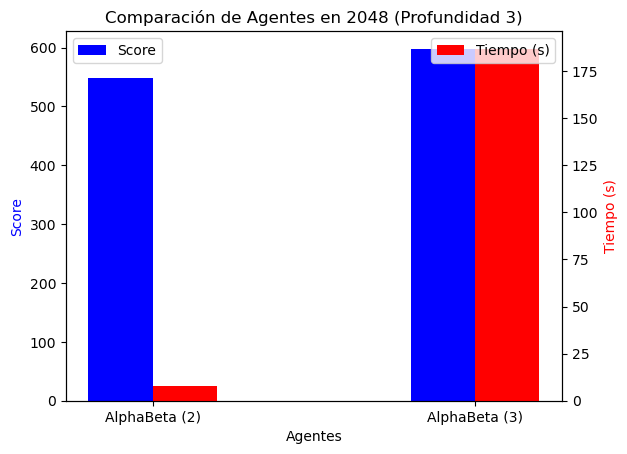

In [6]:
# Graficar resultados
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ancho = 0.2
indices = np.arange(len(agentes))
promedios_scores = [np.mean(resultados[nombre]["scores"]) for nombre in agentes.keys()]
promedios_tiempos = [np.mean(resultados[nombre]["tiempos"]) for nombre in agentes.keys()]
barras1 = ax1.bar(indices - ancho/2, promedios_scores, ancho, label='Score', color='b')
barras2 = ax2.bar(indices + ancho/2, promedios_tiempos, ancho, label='Tiempo (s)', color='r')
ax1.set_xlabel('Agentes')
ax1.set_ylabel('Score', color='b')
ax2.set_ylabel('Tiempo (s)', color='r')
ax1.set_xticks(indices)
ax1.set_xticklabels(agentes.keys())
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de Agentes en 2048 (Profundidad 3)')
plt.show()